In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filePath = 'data/bank-full.csv'
data = pd.read_csv(filePath)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Exploratory Data Analysis

In [3]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [4]:
data.shape

(41188, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [7]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

## Continuous Feature Analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

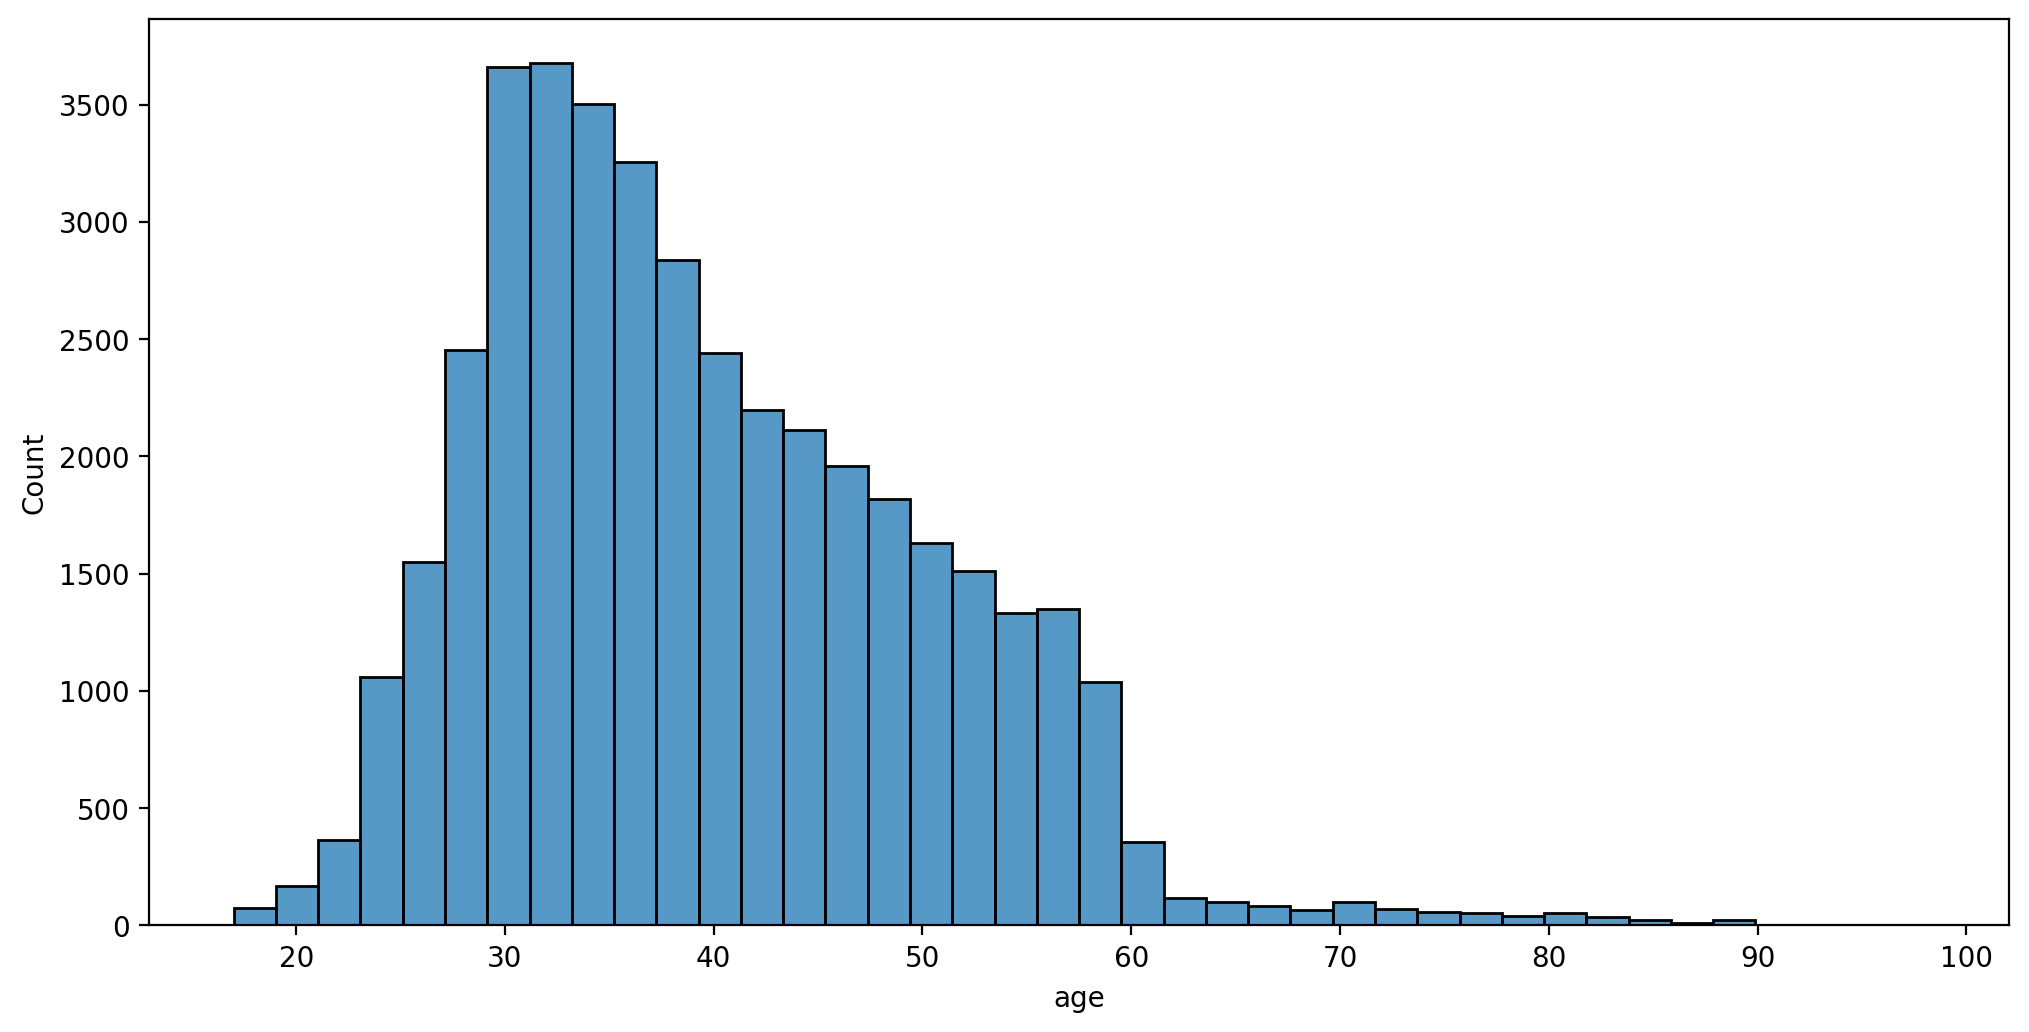

In [10]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=data, x='age', bins=40)

<AxesSubplot:xlabel='age', ylabel='Count'>

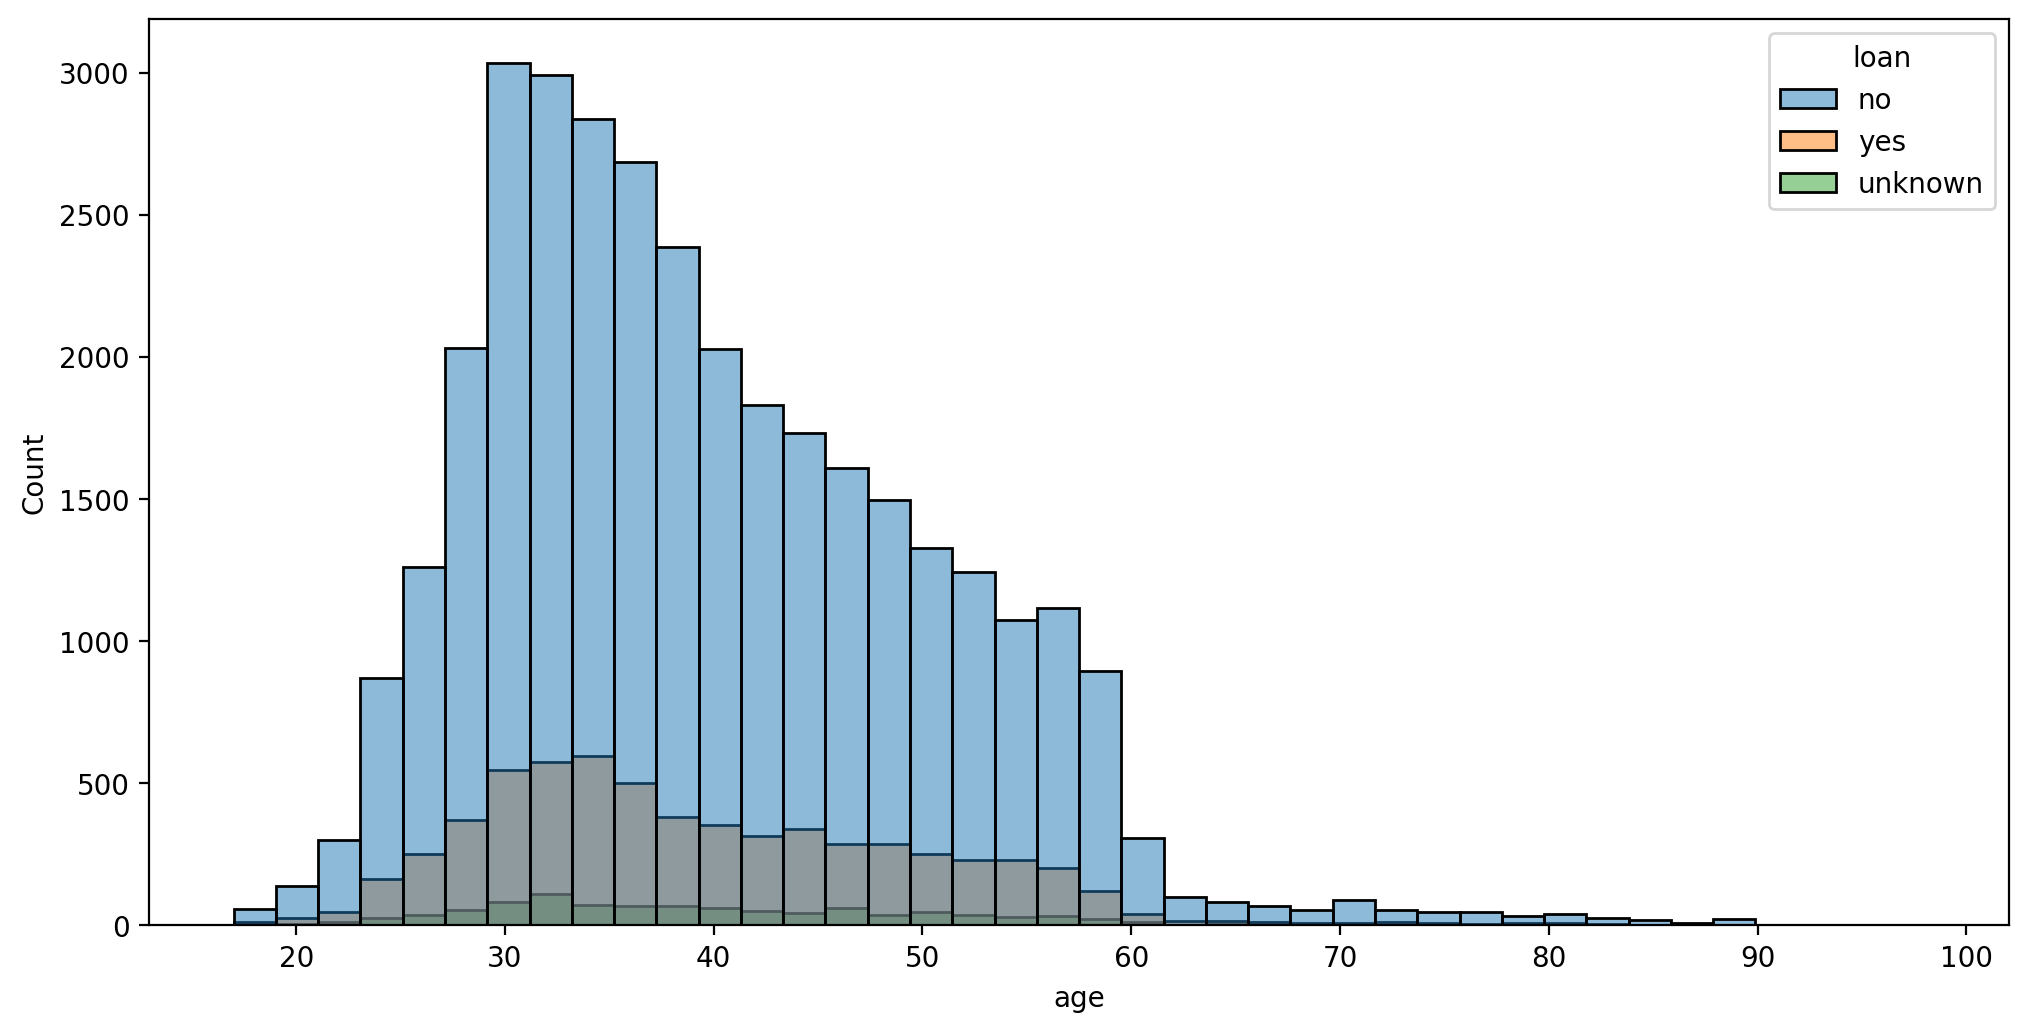

In [15]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=data, x='age', hue='loan', bins=40)

<AxesSubplot:xlabel='pdays', ylabel='Count'>

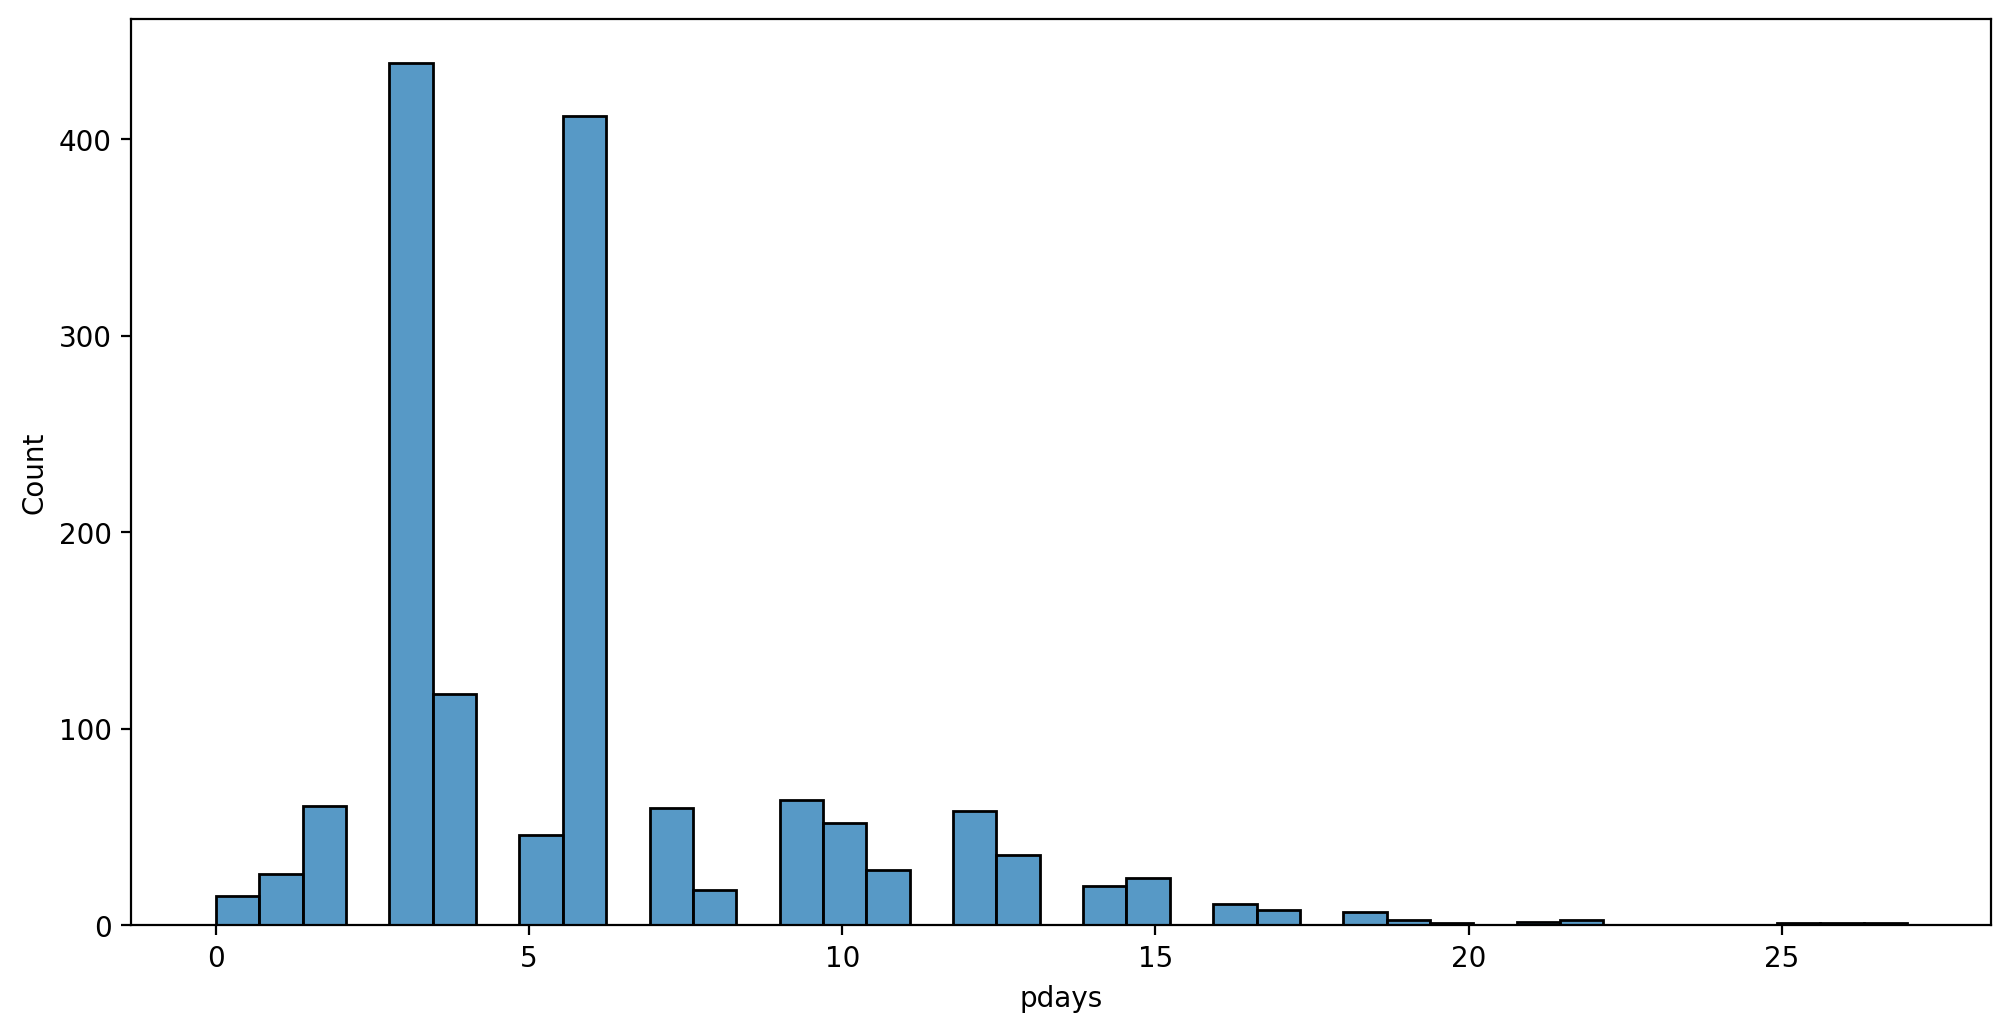

In [19]:
pday = data[data['pdays']!=999]
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=pday, x='pdays')

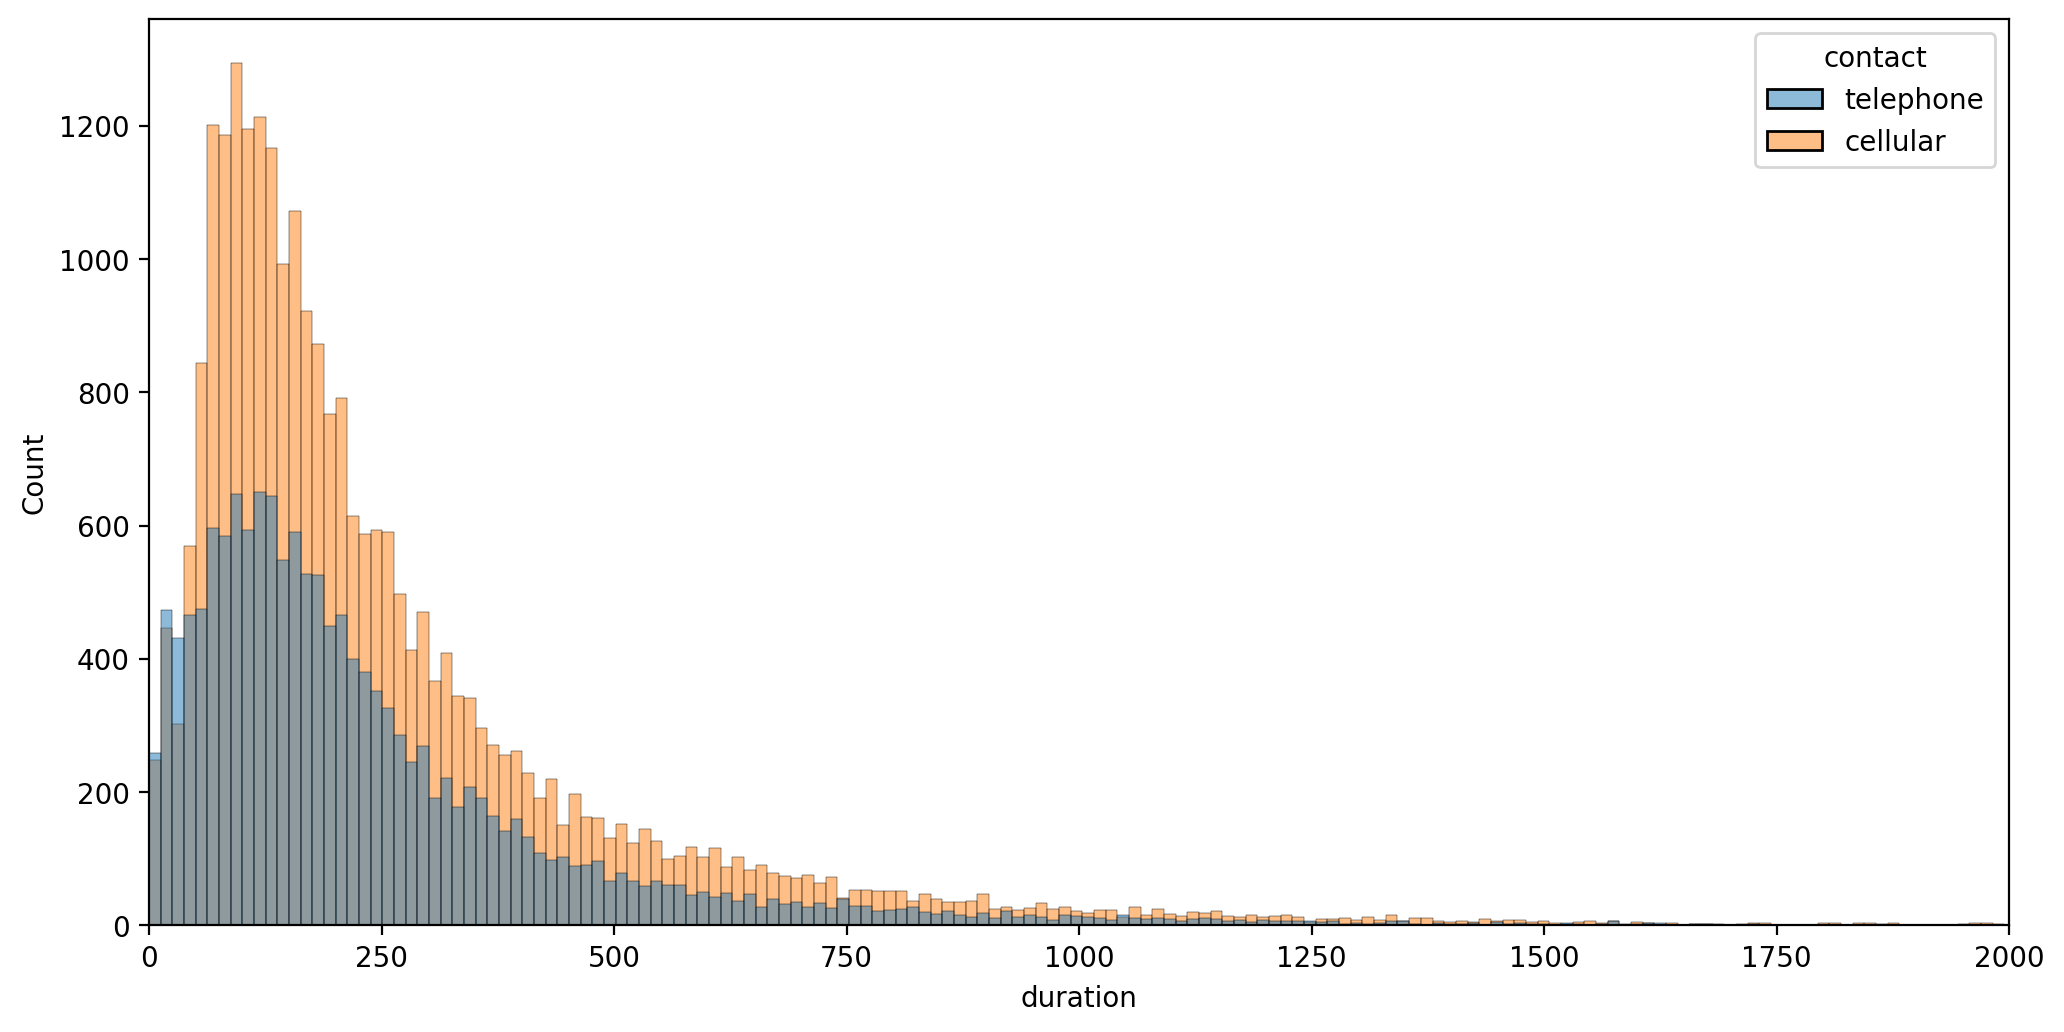

In [26]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=data, x='duration', hue='contact')
plt.xlim(0,2000);

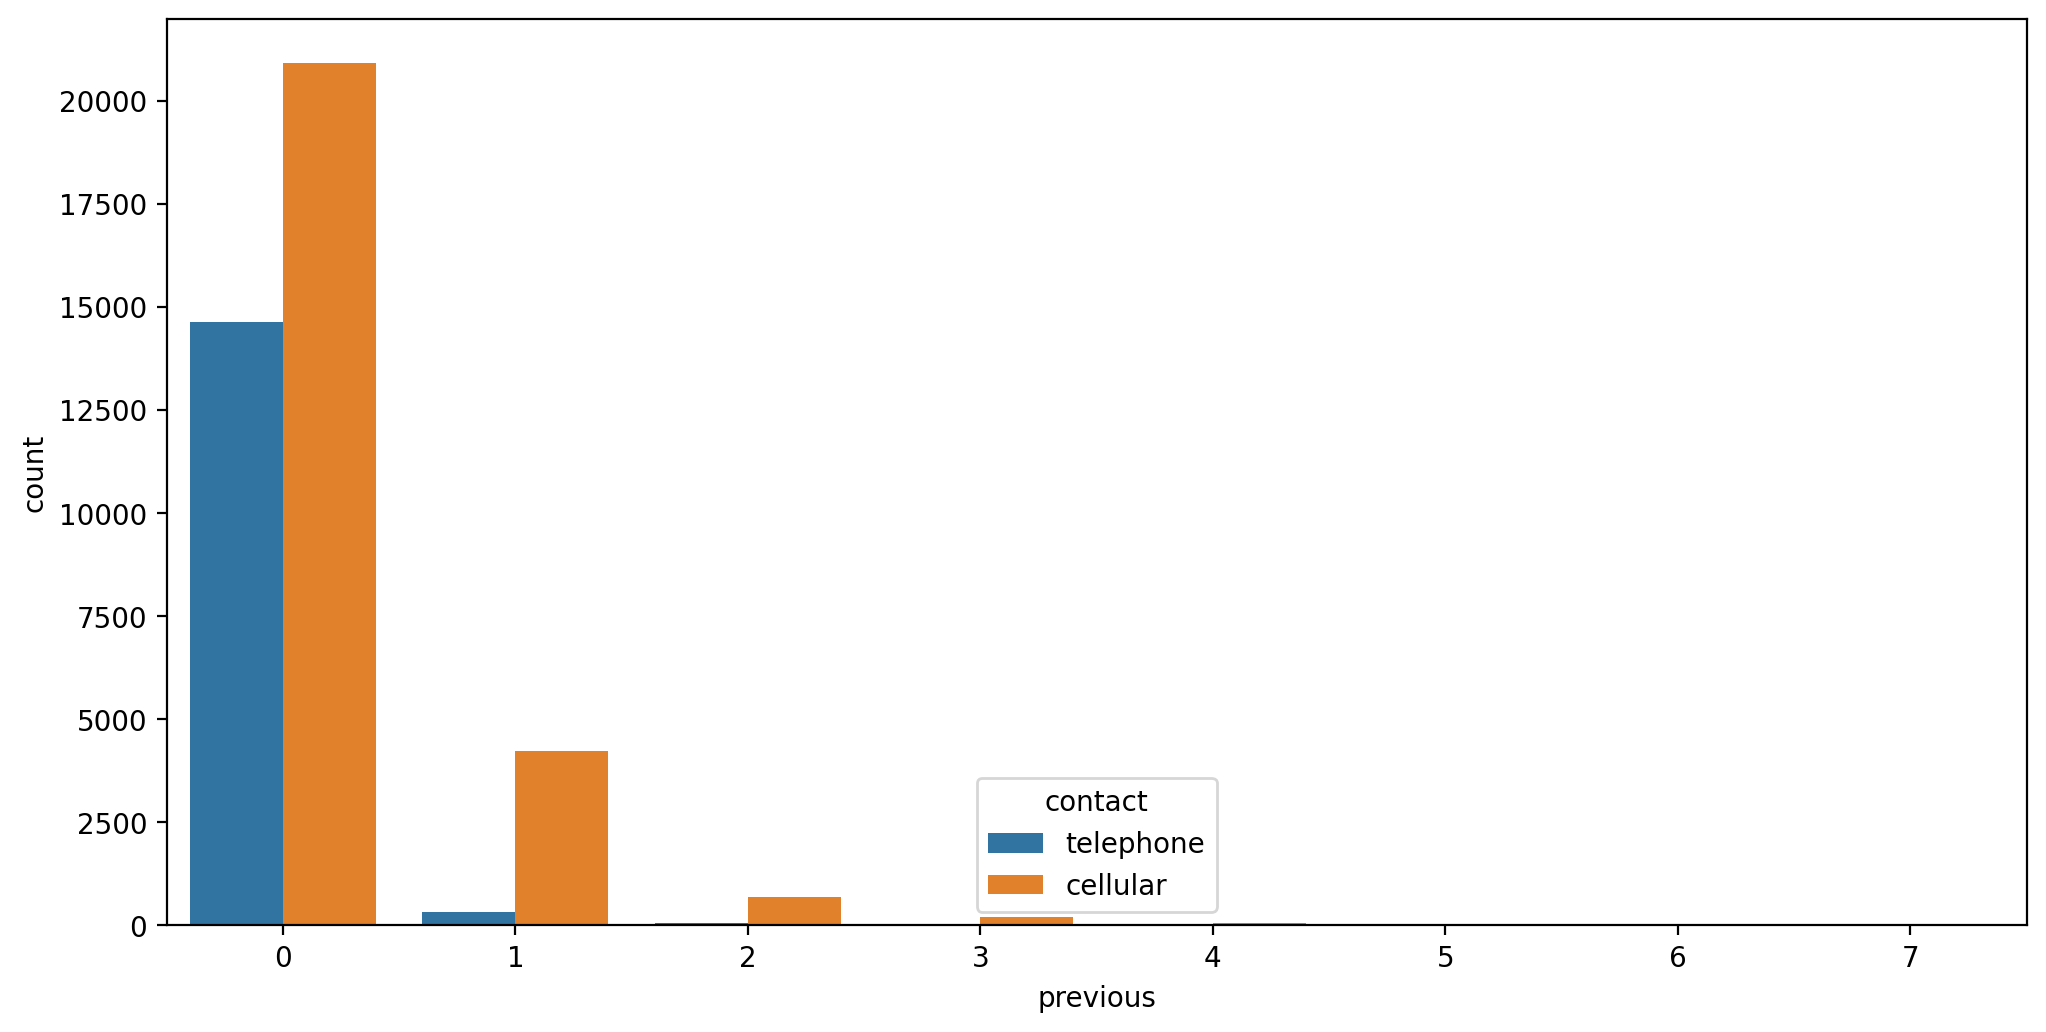

In [29]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=data, x='previous', hue='contact');

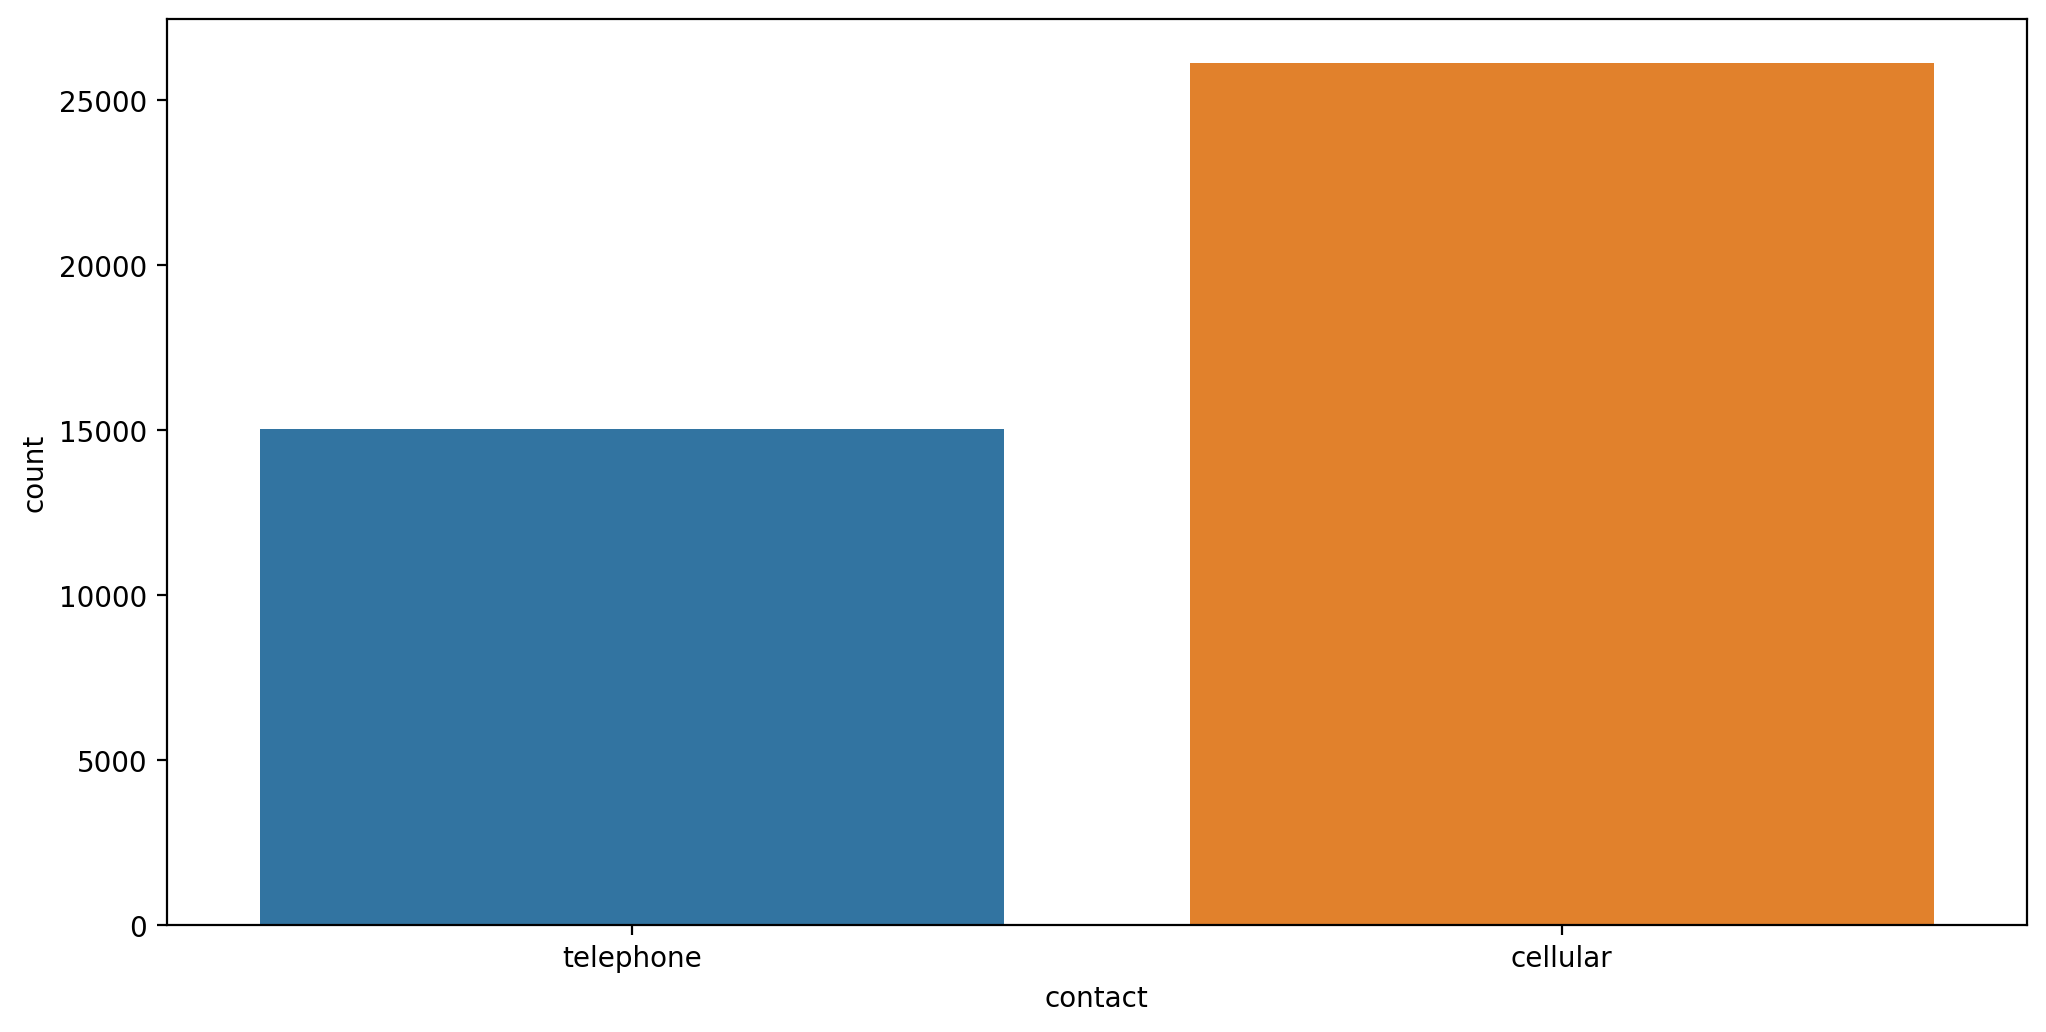

In [31]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=data, x='contact');

In [32]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [33]:
data['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [34]:
data['previous'].value_counts().sum()

41188

## Categorical Analysis

In [35]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


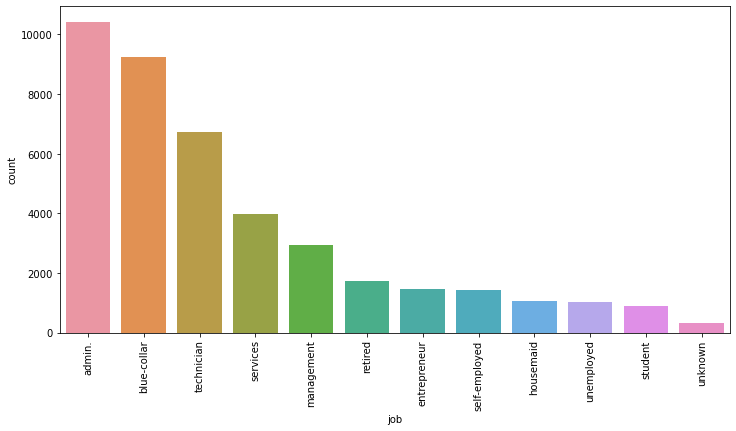

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='job', order=data['job'].value_counts().index)
plt.xticks(rotation=90);

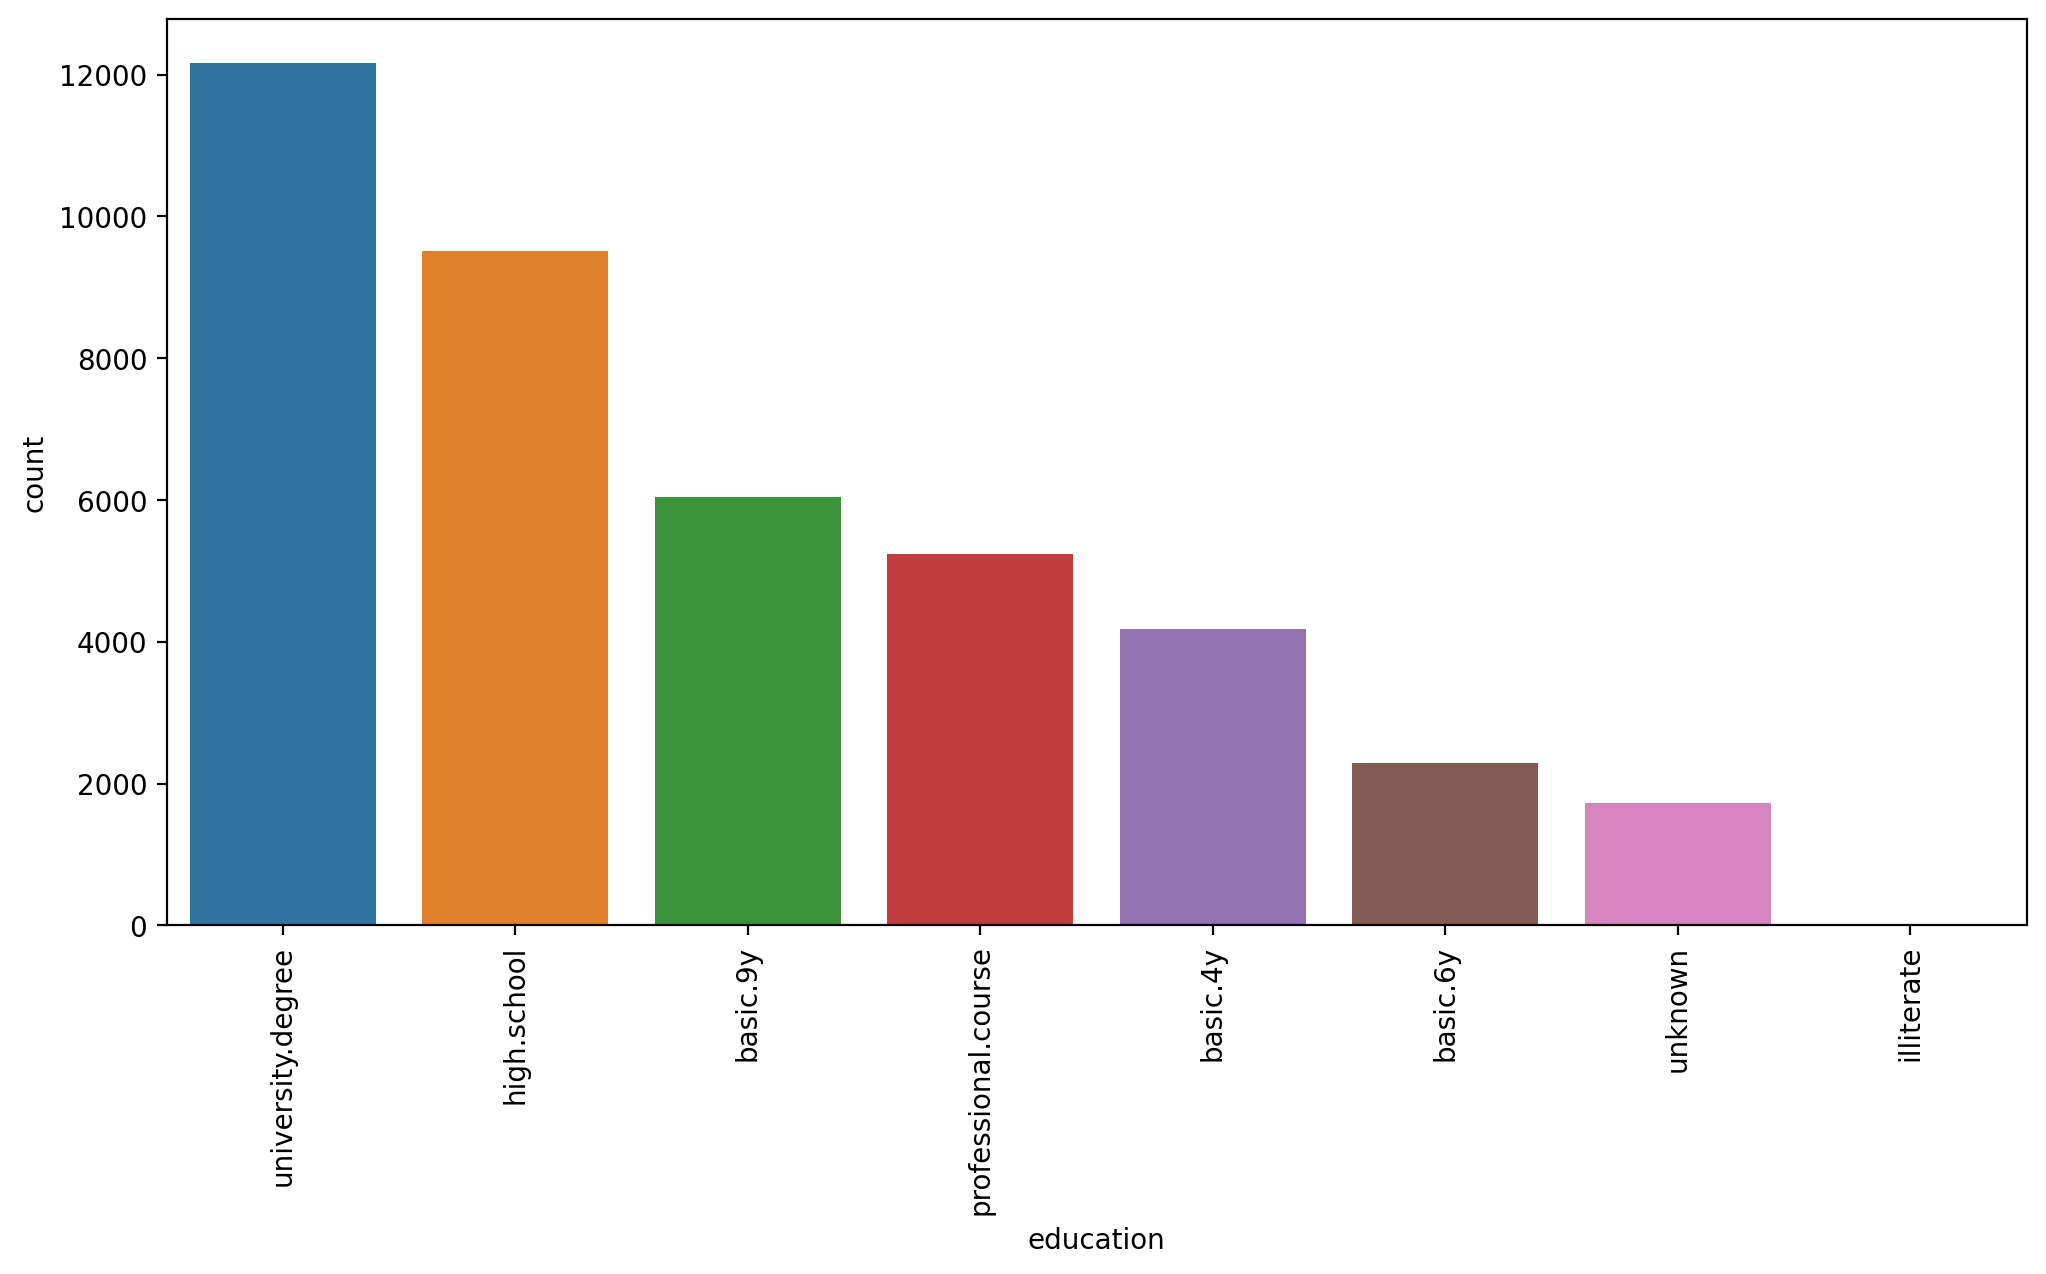

In [45]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=data, x='education', order=data['education'].value_counts().index)
plt.xticks(rotation=90);

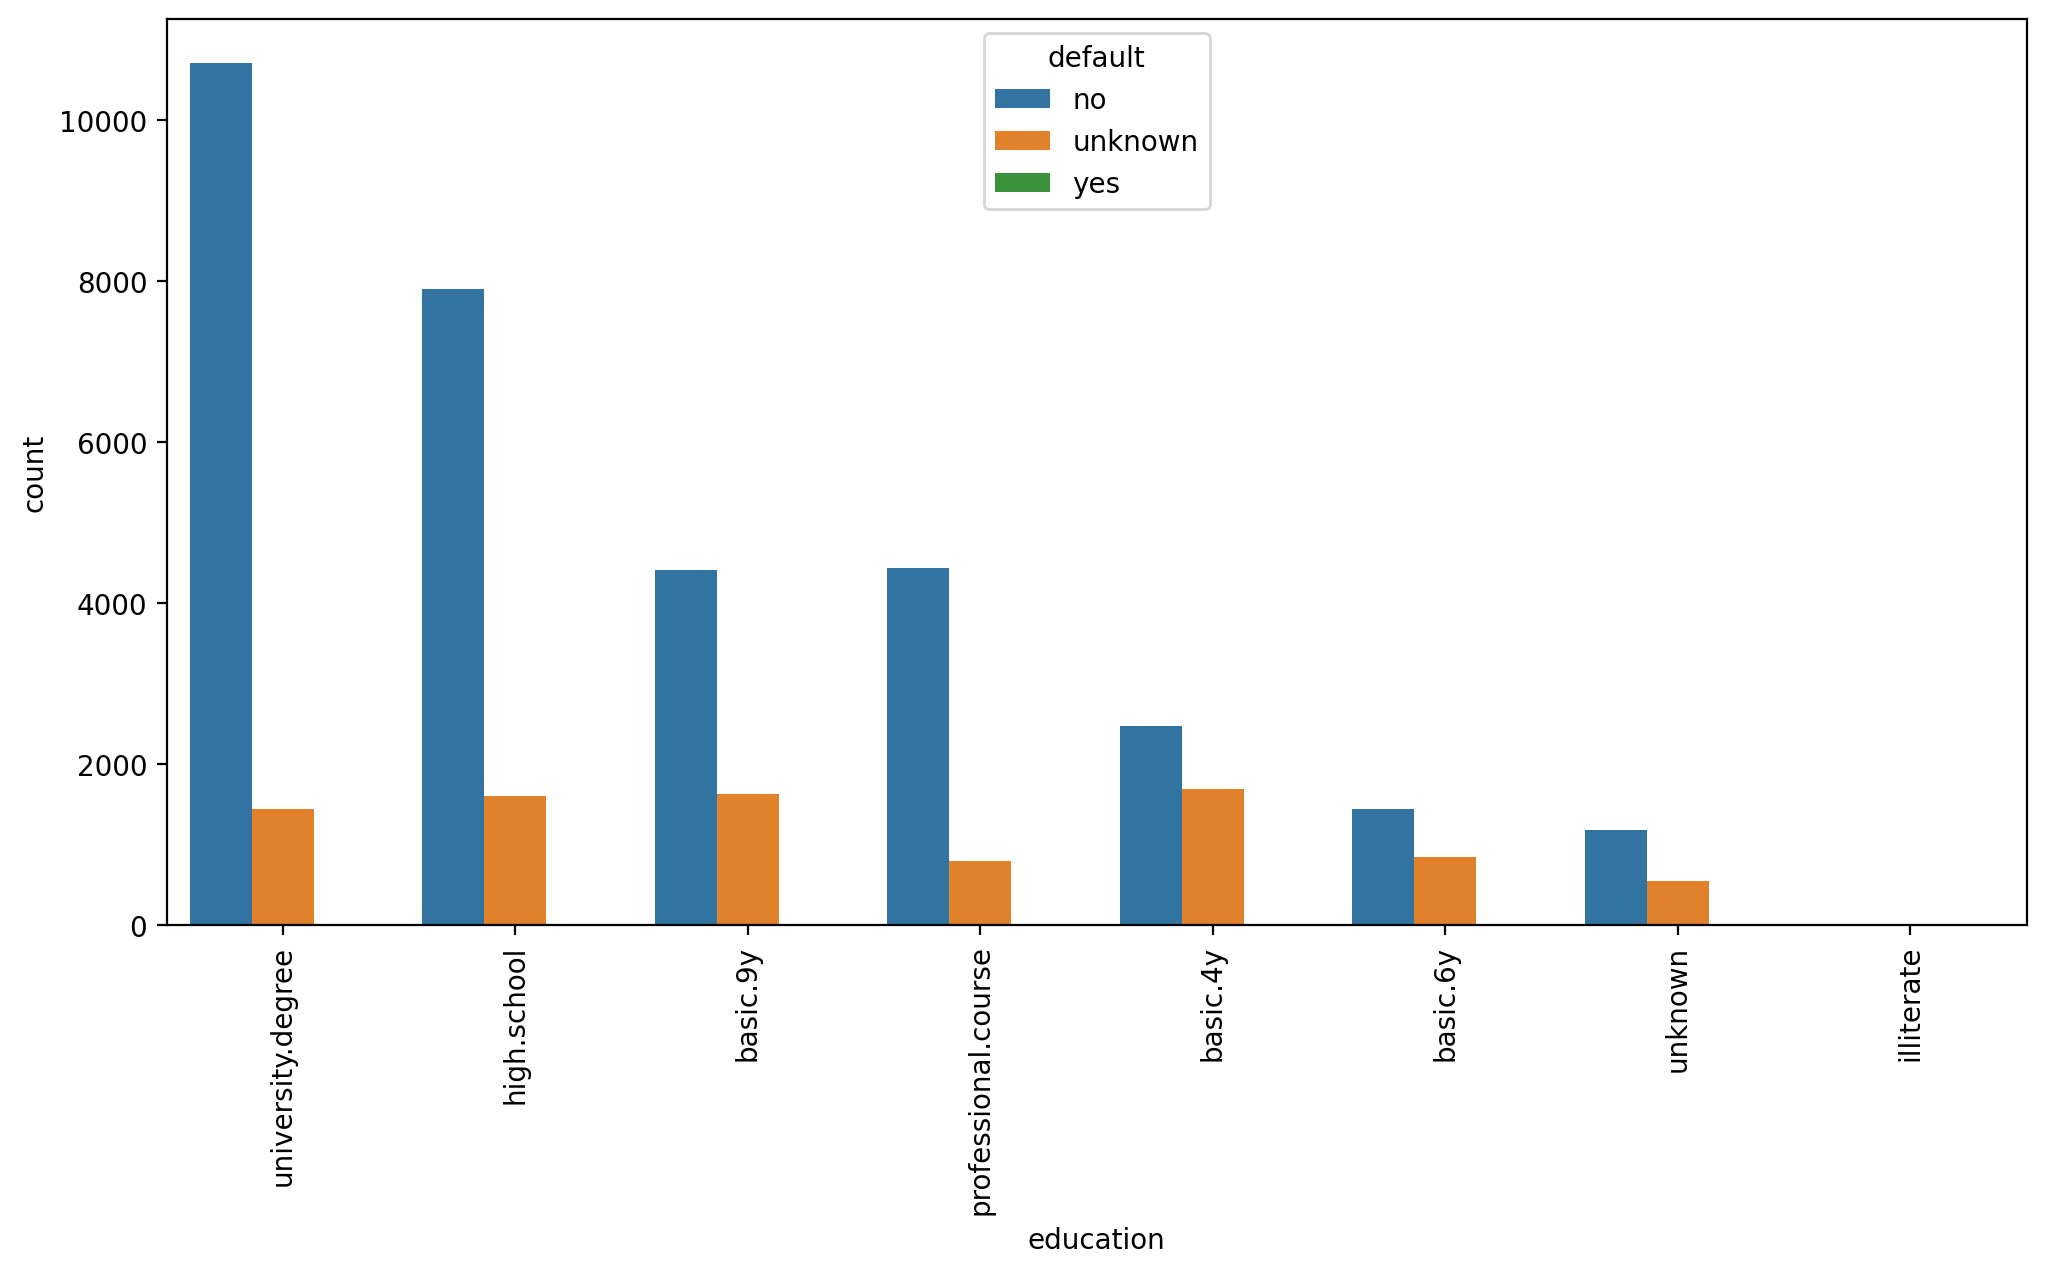

In [46]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=data, x='education', order=data['education'].value_counts().index, hue='default')
plt.xticks(rotation=90);

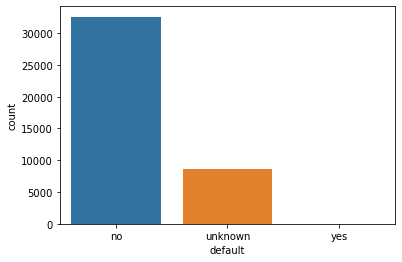

In [48]:
sns.countplot(data=data, x='default');

## Clustering

In [49]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [50]:
X = pd.get_dummies(data)

In [51]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
scaler_X = scaler.fit_transform(X)

In [56]:
from sklearn.cluster import KMeans

In [57]:
model = KMeans(n_clusters=2)

In [63]:
cluster_label = model.fit_predict(scaler_X)

In [64]:
cluster_label

array([0, 0, 0, ..., 1, 1, 1])

In [65]:
X['Cluster'] = cluster_label

In [66]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,1
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,1


<AxesSubplot:>

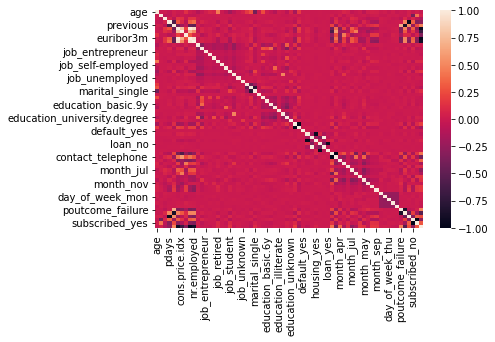

In [67]:
sns.heatmap(X.corr())

In [68]:
X.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,...,0.019027,-0.021356,0.019137,-0.023671,-0.002537,-0.016376,0.035626,-0.030399,0.030399,-0.019767
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,...,-0.023068,0.014666,0.004140,0.014537,-0.013311,-0.011665,0.044876,-0.405274,0.405274,0.039581
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,...,0.014405,0.005141,-0.025125,-0.021088,-0.068890,0.087645,-0.050893,0.066357,-0.066357,-0.129103
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,...,0.001031,-0.008186,-0.007300,0.001021,0.006354,0.491353,-0.950700,0.324914,-0.324914,-0.267714
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,...,-0.002012,0.001512,0.000090,-0.003929,0.682608,-0.878776,0.524045,-0.230181,0.230181,0.478493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
poutcome_nonexistent,-0.016376,-0.011665,0.087645,0.491353,-0.878776,0.472501,0.304264,0.099724,0.488406,0.493051,...,0.002226,-0.000585,0.001574,0.006545,-0.853119,1.000000,-0.466928,0.193507,-0.193507,-0.544406
poutcome_success,0.035626,0.044876,-0.050893,-0.950700,0.524045,-0.256886,-0.077416,0.084824,-0.281022,-0.350613,...,-0.002276,0.008827,0.007258,-0.000390,-0.063006,-0.466928,1.000000,-0.316269,0.316269,0.254406
subscribed_no,-0.030399,-0.405274,0.066357,0.324914,-0.230181,0.298334,0.136211,-0.054878,0.307771,0.354678,...,0.021265,-0.013888,-0.008046,-0.006302,-0.031799,0.193507,-0.316269,1.000000,-1.000000,-0.294472
subscribed_yes,0.030399,0.405274,-0.066357,-0.324914,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,...,-0.021265,0.013888,0.008046,0.006302,0.031799,-0.193507,0.316269,-1.000000,1.000000,0.294472


In [69]:
X.corr()['Cluster']

age                    -0.019767
duration                0.039581
campaign               -0.129103
pdays                  -0.267714
previous                0.478493
                          ...   
poutcome_nonexistent   -0.544406
poutcome_success        0.254406
subscribed_no          -0.294472
subscribed_yes          0.294472
Cluster                 1.000000
Name: Cluster, Length: 66, dtype: float64

<AxesSubplot:>

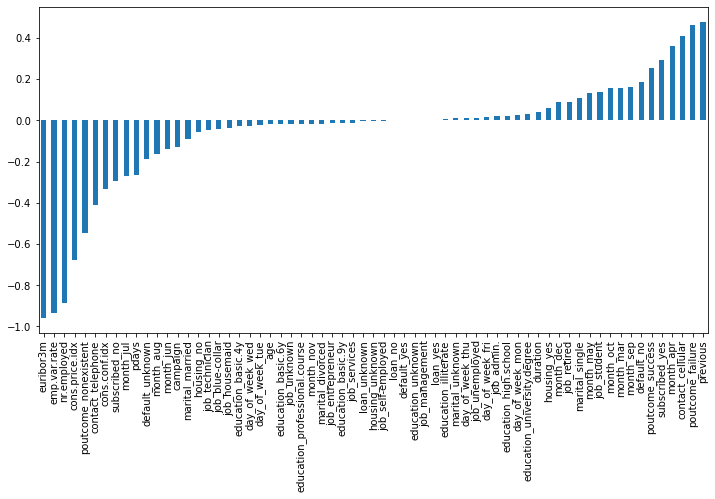

In [71]:
plt.figure(figsize=(12,6))
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

## Choosing the right K value

In [73]:
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k) 
    model.fit(scaler_X)
    
    ssd.append(model.inertia_)

Text(0, 0.5, 'Sum of squared Distance')

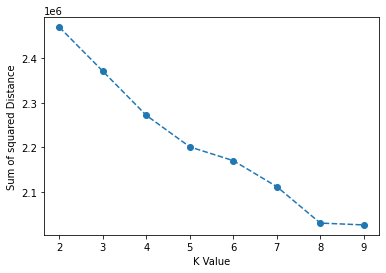

In [74]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of squared Distance")

In [75]:
ssd

[2469792.367302056,
 2370786.6626720186,
 2271503.2235369184,
 2200694.2311942847,
 2169756.9060791107,
 2111319.78465061,
 2029347.6979756632,
 2025223.474258906]

THE END